In [1]:
import astropy.units as u
from radio_beam import Beam, commonbeam, Beams
from astropy.io import fits
import warnings
from astropy.wcs import WCS
import astropy.units as u
from astropy.convolution import convolve
import matplotlib.pyplot as plt
import numpy as np
from astropy.visualization import simple_norm
from astropy.stats import mad_std
from astropy import visualization

In [2]:
import glob

folder = "/Users/nbudaiev/UFL Dropbox/Nazar Budaiev/Research/ACES/dataverse_files/"
fits_files = glob.glob(f"{folder}/*.continuum.fits")

headers = [fits.open(fname)[0].header for fname in fits_files]

In [3]:
bmajs = [header['BMAJ'] for header in headers]
bmins = [header['BMIN'] for header in headers]
pas = [header['BPA'] for header in headers]

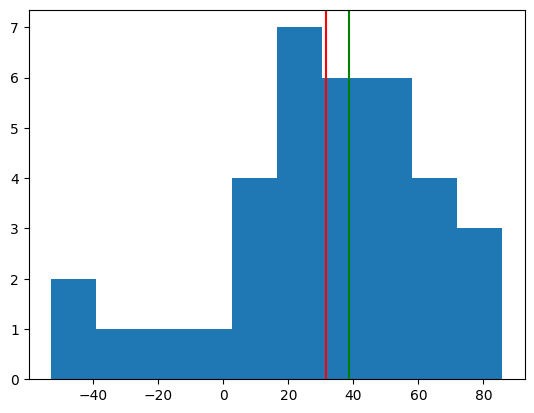

In [4]:
plt.hist(pas)
plt.axvline(np.mean(pas), color = 'r')
plt.axvline(np.median(pas), color = 'g')

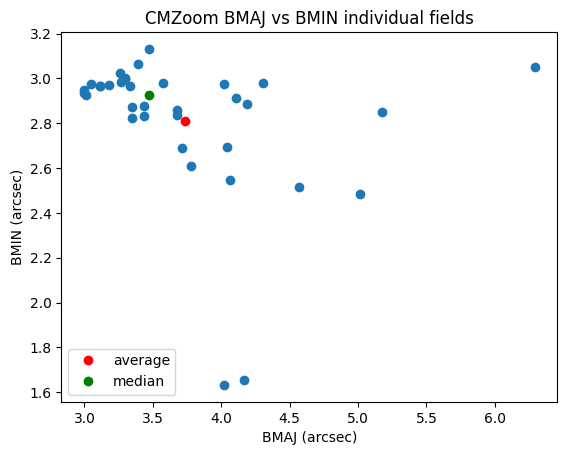

In [5]:
plt.scatter((bmajs*u.deg).to(u.arcsec), (bmins*u.deg).to(u.arcsec))
plt.plot(np.average((bmajs*u.deg).to(u.arcsec)), np.average((bmins*u.deg).to(u.arcsec)), 'ro', label = 'average')
plt.plot(np.median((bmajs*u.deg).to(u.arcsec)), np.median((bmins*u.deg).to(u.arcsec)), 'go', label = 'median')
plt.xlabel('BMAJ (arcsec)')
plt.ylabel('BMIN (arcsec)')
plt.title('CMZoom BMAJ vs BMIN individual fields')
plt.legend()

In [6]:
#cmzoom_beam = Beam(np.median((bmajs*u.deg).to(u.arcsec)), np.median((bmins*u.deg).to(u.arcsec)), np.mean(pas)*u.deg)

In [8]:
path_to_mosaic = '/Users/nbudaiev/UFL Dropbox/Nazar Budaiev/Research/ACES/12m_continuum_commonbeam_circular_reimaged_mosaic.fits'
mosaic_hdul = fits.open(path_to_mosaic)
wcs_aces = WCS(mosaic_hdul[0].header)
aces_beam = Beam.from_fits_header(mosaic_hdul[0].header)
#path_to_meerkat = '/Users/nbudaiev/UFL Dropbox/Nazar Budaiev/Research/ACES/MeerKAT_Galactic_Centre_1284MHz-StokesI.fits'
#meerkat_hdul = fits.open(path_to_meerkat)
#meerkat_beam = Beam.from_fits_header(meerkat_hdul[0].header)
##common_beam = commonbeam(aces_beam, meerkat_beam)
#beams =  Beams(beams=[meerkat_beam,aces_beam])
#common_beam = beams.common_beam()

hdr_aces = mosaic_hdul[0].header


path_to_cmzoom = '/Users/nbudaiev/UFL Dropbox/Nazar Budaiev/Research/ACES/CMZoom_continuum_pbcor.fits'
cmzoom_hdul = fits.open(path_to_cmzoom)
#cmzoom_beam = Beam.from_fits_header(cmzoom_hdul[0].header)
#beams =  Beams(beams=[cmzoom_beam,aces_beam])
#common_beam = beams.common_beam()

In [ ]:
# CMZoom mosaic is in Jy/sr to account for the beam differences between different fields
# To get spectral index, we must convert ACES to the same units.

In [ ]:
data_jy_per_sr = mosaic_hdul[0].data / aces_beam.sr

In [14]:
np.nanmax(data_jy_per_sr)

<Quantity 2.54850452e+10 1 / sr>

In [ ]:
# aces_scale = wcs_aces.proj_plane_pixel_scales()[0]

# kernel = common_beam.deconvolve(aces_beam).as_kernel(aces_scale)

# conv_aces = convolve(mosaic_hdul[0].data, kernel, preserve_nan=True)

# area_rat = (common_beam.sr/aces_beam.sr).value

# conv_aces_adj = conv_aces * area_rat

In [29]:
np.nanmax(conv_aces)

np.float64(3.21713052287908)

In [30]:
np.nanmax(conv_aces_adj)

np.float64(4.981700731878979)

In [31]:
np.nanmax(mosaic_hdul[0].data)

np.float64(4.448284615037065)

In [32]:
hdr_aces.update(common_beam.to_header_keywords())

In [33]:
fits.writeto('12m_continuum_commonbeam_circular_reimaged_mosaic_convolved_with_cmzoom.fits', conv_aces_adj, hdr_aces, overwrite = True)